In [ ]:
# Pillow - 适用于python3版本的PIL, image处理工具
# pip安装
# pip3 install Pillow


# 导入
# from PIL import Image


# 基础理论:
# 1.像素点 - 每个像素点由(255,255,255,255)的RGBA组成, 每个原色占据1 byte空间, 即一个像素占据4 bytes

# 2.坐标 - 从屏幕左上角开始, 向右延伸为x轴方向, 向下延伸为y轴方向

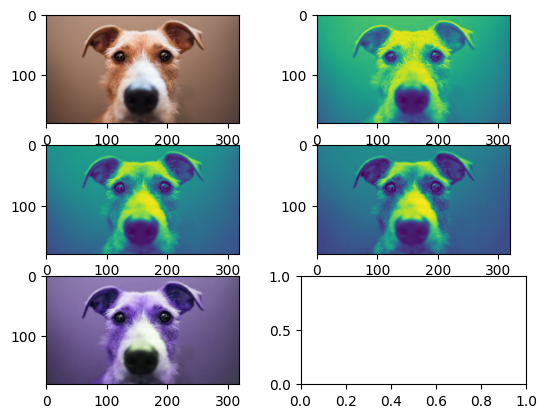

In [1]:
# 例1.分拆RGB模式为L模式, 并重新组合为RGB模式(GBR顺序)
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

image = Image.open('/home/steven/Downloads/dog.jpg')
arr = np.array(image)
arr_r = arr[:, :, 0]
arr_g = arr[:, :, 1]
arr_b = arr[:, :, 2]
image_r = Image.fromarray(arr_r, mode="L")
image_g = Image.fromarray(arr_g, mode="L")
image_b = Image.fromarray(arr_b, mode="L")
image_merge = Image.merge("RGB", (image_g, image_b, image_r))
fig, axes = plt.subplots(3, 2)
axes[0][0].imshow(image)
axes[0][1].imshow(image_r)
axes[1][0].imshow(image_g)
axes[1][1].imshow(image_b)
axes[2][0].imshow(image_merge)
plt.show()

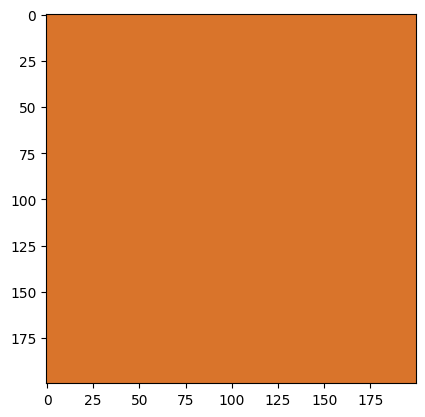

In [2]:
# 例2 - 手动创建新图片
import matplotlib.pyplot as plt
from PIL import Image

image = Image.new("RGB", (200, 200), (217, 116, 43))
fig, axes = plt.subplots()
axes.imshow(image)
plt.show()

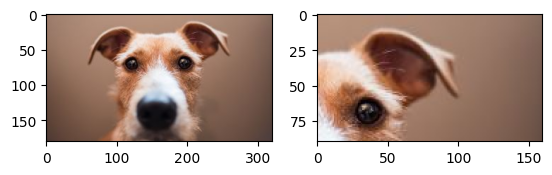

In [3]:
# 例3 - 裁剪图片
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

image = Image.open('/home/steven/Downloads/dog.jpg')
image_crop = image.crop((160, 0, 320, 90))
fig, axes = plt.subplots(1, 2)
axes[0].imshow(image)
axes[1].imshow(image_crop)
plt.show()

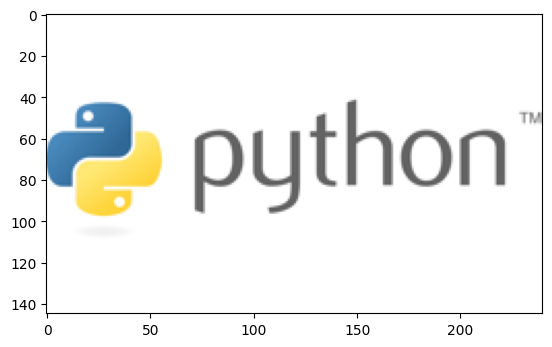

In [14]:
# 例4 - 不按比例裁剪图片
from PIL import Image

image = Image.open('/home/steven/Downloads/Python-Logo.jpg')
image_rs = image.resize((240,145))
fig, axes = plt.subplots(1, 1)
axes.imshow(image_rs)
plt.show()
# image_rs.save('/home/steven/Downloads/python_logo_rs.jpg')

In [15]:
# 例5 - 图片拼接
from PIL import Image
import matplotlib.pyplot as plt

image_ubuntu = Image.open('/home/steven/Downloads/Ubuntu-Logo.png')
image_python = Image.open('/home/steven/Downloads/Python-Logo.jpg')
image_ubuntu_c = image_ubuntu.convert('RGB')
image_ubuntu_c = image_ubuntu_c.resize((120, 145))
image_python = image_python.resize((120, 145))
image_result = Image.new('RGB', (240, 145), 'white')
image_result.paste(image_ubuntu_c, (0,0))
image_result.paste(image_python, (120, 0))
image_result.save('/home/steven/Downloads/ubun_python_con.jpg')
# fig, axes = plt.subplots(1, 1)
# axes.imshow(image_result)
# plt.show()

In [ ]:
# Image模块
# constant:
# MAX_IMAGE_PIXELS
#     单个图片允许的像素上限
#     超过该上限出现DecompressionBombWarning提示
#     超过两个该数值, 则抛出DecompressionBombError异常
# 
# 
# function:
# fromarray(obj, mode=None) --> Image
#     从数组创建Image对象
#         obj - array_like类型, 构成Image的序列
#         mode - str类型, 指定颜色模式, 必须与obj的最后一维的长度一致. 默认由obj的shape推断
# 
# 
# merge(mode, bands) --> Image
#     将多个单色模式图片组合称多色彩模式图片
#         mode - str格式, 生成Image的颜色组合模式
#         bands - tuple格式, 由多个L模式Image组成
# 
# 
# new(mode, size, color=0)
#     使用指定色彩模式和大小创建新Image对象(所有像素点使用同一个颜色) 
#         mode - str格式, 指定色彩模式, 列表如下: 
#             1 - 1bit, 代表黑白模式
#             L - 8bit, 代表黑白模式
#             RGB - 3byte, 代表真彩色
#             RGBA - 4byte, 代表真彩色(带透明度) 
#             CMYK - 4byte, 色彩分割模式
#         size - tuple格式, 图片大小(width, height)
#         color - int/tuple/str类型, 由mode确定. 默认为black. mode模式与参数格式参照如下: 
#             1 - int, 0-1 
#             L - int, 0-255(测试不支持) 
#             RGB - 3元素tuple, 可使用颜色字符串确定
#             RGBA - 4元素tuple, 可使用颜色字符串确定
#             CMYK - 4元素tuple
# 
# 
# open(fp, mode='r', formats=None) --> Image
#     打开文件并返回Image对象. 此方法为懒惰方法, 打开后并不读取内容, 直到手动获取图片数据或使用load()
#         fp - str或file-object格式, 指定打开的文件. file-object为二进制打开模式
#         mode - str格式, 必须为'r' 
#         formats - list/tuple格式, 限定加载图片格式范围. None表示尝试所有支持的格式. python指令: python -m PIL可查看所有支持的格式及对应支持的操作

In [ ]:
# Image.Image类
# variable:
# filename
#     文件名
#
# format
#     文件格式
#
# mode
#     图像颜色模式
#
# size
#     图片大小
#
#
# method:
# convert(mode=None, matrix=None, dither=None, palette=Palette.WEB, colors=256) --> Image
#     将图片转化为指定颜色模式, 支持在L/RGB/CMYK模式之间互相转换. 参数列表如下:
#         mode - str格式, 指定要转化的颜色模式
#         matrix - tuple格式, 12个浮点数的转化矩阵
#     ** RGB转化为L模式的公式: L = R * 299/1000 + G * 587/1000 + B * 114/1000
#
#
# crop(box=None) -> Image
#     获取图片的裁剪内容. 参数列表如下:
#         box - (left, upper, right, lower)格式, 指定裁剪区域
#
#
# getchannel(channel) -> Image
#     获取其中单个色带. 参数列表如下:
#         channel - int/str格式, 0指定'RGB'中的R, 也可直接使用'R'指定
#
#
# paste(im, box=None, mask=None)
#     将图像im复制到当前图像的box区域. 参数列表如下:
#         im - image对象, 需要复制的图像
#         box - 2-tuple或4-tuple, 当tuple为2个元素时, 指定左上角, 长宽根据im或mask来推测; 当tuple指定4个元素时, 指定(left, upper, right, lower), 并且im大小与box大小必须一致. 默认为(0,0)
#         mask - Image对象, 该对象必须包含alpha值(1/L/LA/RGBA/RGBa), 取出该对象的alpha值, 获取遮罩效果
#
#
# resize(size, resample=None, box=None, reducing_gap=None) --> Image
#     重置大小的图片(copy). 参数列表如下:
#         resize - (width, height)格式, 重置后的大小
#         resample - filter类型, 采样方式. L/RGB默认为PIL.Image.Resampling.BICUBIC
#         box - (x, y, width, height)格式, 从原图像中选取指定区域后再重置大小
#
#
# rotate(angle, resample=Resanpling.NEAREST, expand=0, center=None, translate=None, fillcolor=None) --> Image
#     以中心为轴, 逆时针旋转指定角度, 并返回旋转后的Image对象. 参数列表如下:
#         angle - 格式, 逆时针旋转角度
#         resample - filter格式, 采样模式
#         expand - bool格式, 是否拓展长宽, 使其能容纳旋转后的图像. 默认旋转后的图片与旋转前的分辨率完全一致
#         center - tuple格式, 旋转中心位置. 默认为图片中心
#         translate - tuple格式, 将旋转后的图片在背景中进行移动
#         fillcolor - tuple/str格式, 使用颜色填充旋转后的空白区域
#
#
# save(fp, format=None, **params)
#     将修改后的图片内容保存到指定文件. 参数列表如下:
#         fp - str或file-object格式, 指定保存的文件
#         format - str格式, fp为str时可根据文件名推测; 当fp使用file-object必须指定
#
#
# show(title=None)
#     使用系统自带图片浏览器查看图片, 会生成临时图片, 主要用于debugging目的
#     建议使用matplotlib.pyplot.imshow方法. 参数列表如下:
#         title - 窗口标题
#
#
# split()
#     将Image分解为单色带. 如: RGB Image分解为(R, G, B)三个Image
#
#
# transpose(method) --> Image
#     翻转或旋转Image对象. 参数列表如下:
#         method - 对图形的操作, 列表如下:
#             PIL.Image.Transpose.FLIP_LEFT_RIGHT - 左右翻转
#             PIL.Image.Transpose.FLIP_TOP_BOTTOM - 上下翻转
#             PIL.Image.Transpose.ROTATE_90 - 逆时钟旋转90度
#             PIL.Image.Transpose.ROTATE_180 - 逆时钟旋转180度
#             PIL.Image.Transpose.ROTATE_270 - 逆时钟旋转270度
#             PIL.Image.Transpose.TRANSPOSE - 矩阵转置
#             PIL.Image.Transpose.TRANSVERSE - 以左下角作为原点, 置换x/y轴
#
#
# thumbnail(size, resample=Resampling.BICUBIC, reducing_gap=2.0)
#     等比例缩略图(in-place). 参数列表如下:
#         size - tuple格式, 指定缩略图的(width, height), 按缩小比例最大的边进行等比例收缩
#         resample - filter格式, 采样模式
#
#
# ** 采样模式参考: https://pillow.readthedocs.io/en/stable/handbook/concepts.html#concept-filters
#
# ** warning: Pillow与PIL不能同时存在

In [ ]:
# 最后编辑于: 2022-09-15

In [ ]:
# 引用:
# [1] pillow readthedocs: https://pillow.readthedocs.io/en/stable/